In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
top2017 = pd.read_csv("data/featuresdf2017.csv")
top2018 = pd.read_csv("data/top2018.csv")

In [3]:
print(top2017.columns)
print(top2018.columns)

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')
Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')


In [4]:
averages_2017 = []
averages_2018 = []

for i in range(3, len(top2017.columns)):
    averages_2017.append(np.mean(top2017[top2017.columns[i]]))
    averages_2018.append(np.mean(top2018[top2018.columns[i]]))

In [5]:
top2017new = top2017[['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']]

In [6]:
len(top2017.columns)

16

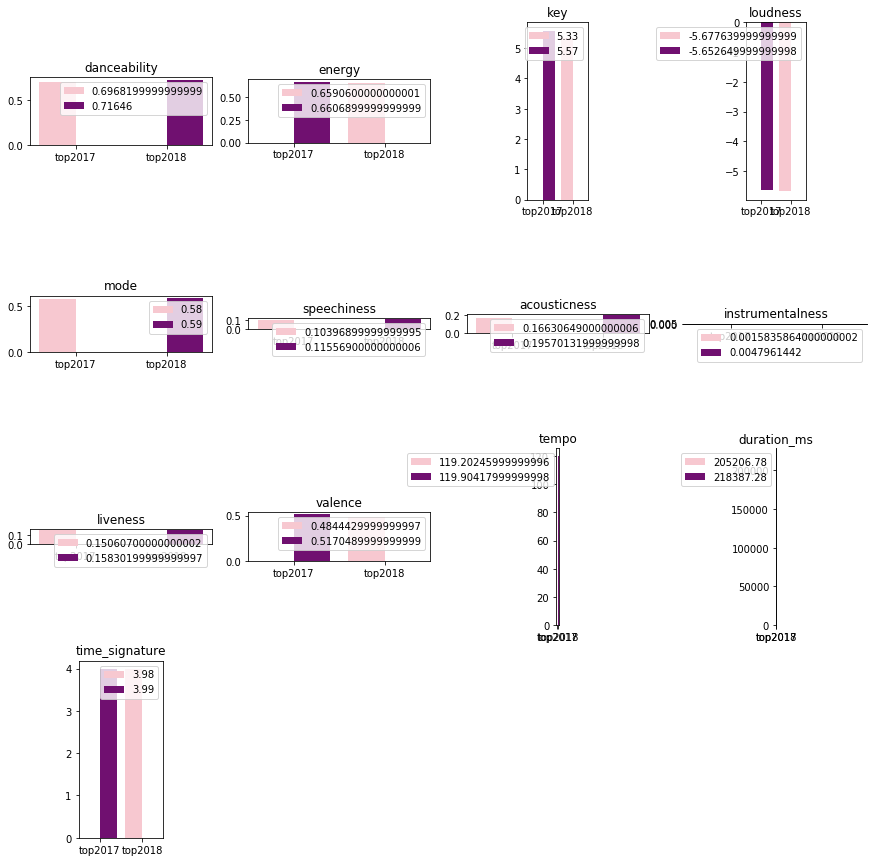

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
for i, column in enumerate(top2017.columns[3:]):
    mean = [('top2017', np.mean(top2017[column])), ('top2018', np.mean(top2018[column]))]
    
    plt.subplot(4,4,i+1)
    plt.title(column)
    sns.barplot(pd.Series([value[0] for value in mean]), pd.Series([value[1] for value in mean]), hue=[value[1] for value in mean], palette=['pink', 'purple']).set_aspect('equal')

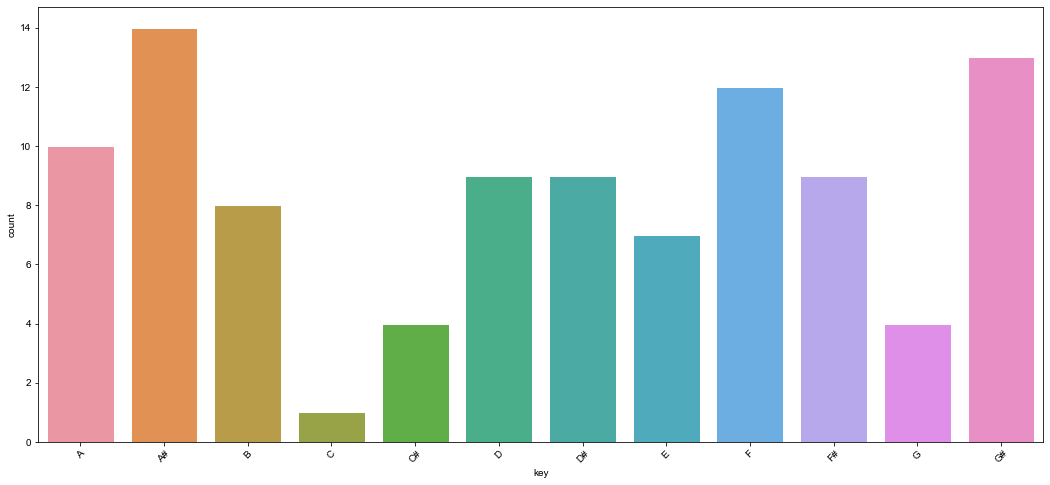

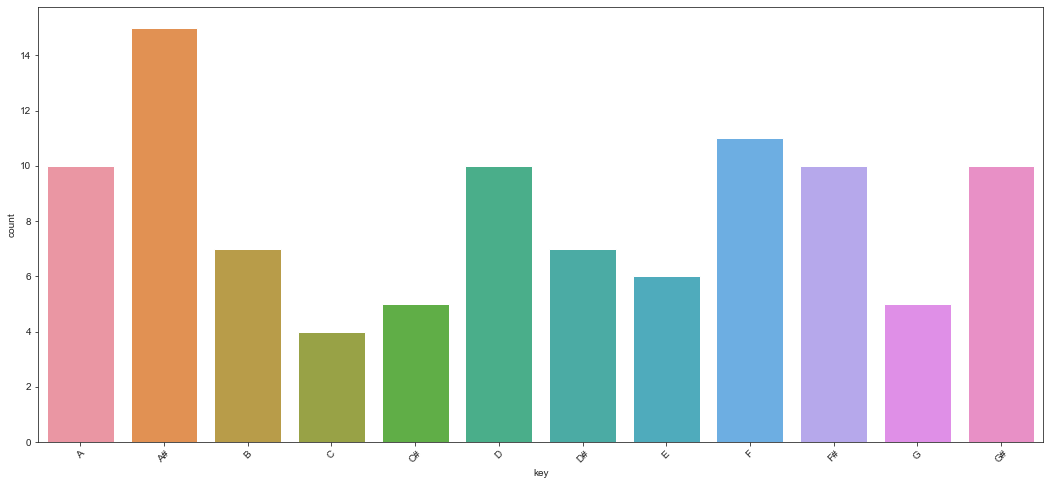

In [8]:
bar_cols = top2017[['key','mode','time_signature']]
top2017key = top2017.replace({'key':{0:'A', 1:'A#', 2:'B', 3:'C', 4:'C#', 5:'D', 6:'D#', 7:'E', 8:'F', 9:'F#', 10:'G', 11:'G#'}})
top2018key = top2018.replace({'key':{0:'A', 1:'A#', 2:'B', 3:'C', 4:'C#', 5:'D', 6:'D#', 7:'E', 8:'F', 9:'F#', 10:'G', 11:'G#'}})

for col in ['key']:
    df_temp = top2017key.groupby([col]).size().reset_index(name='count')
    plt.figure(figsize=(18,8))
    plt.xticks(rotation=45)
    sns.set_style("ticks")
    sns.barplot(data = df_temp, x= col, y= 'count')
    
    df_temp = top2018key.groupby([col]).size().reset_index(name='count')
    plt.figure(figsize=(18,8))
    plt.xticks(rotation=45)
    sns.set_style("ticks")
    sns.barplot(data = df_temp, x= col, y= 'count')

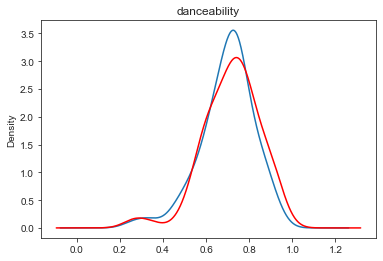

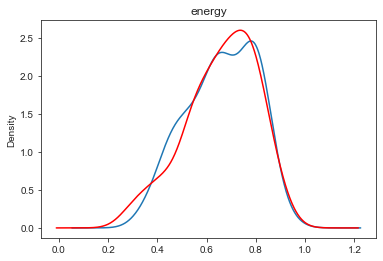

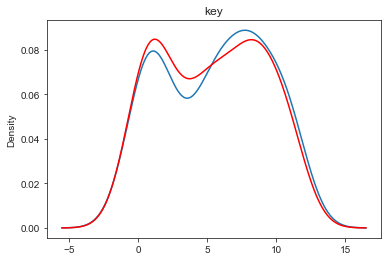

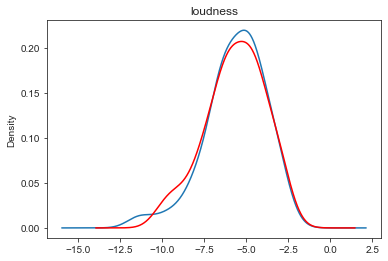

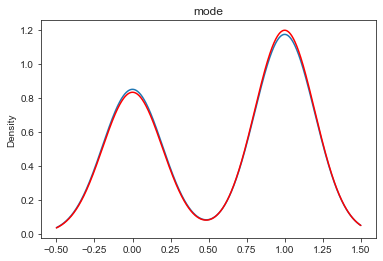

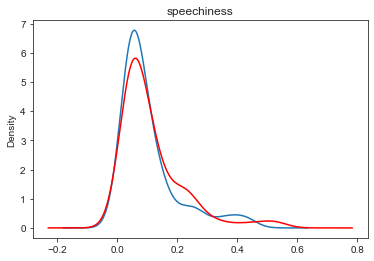

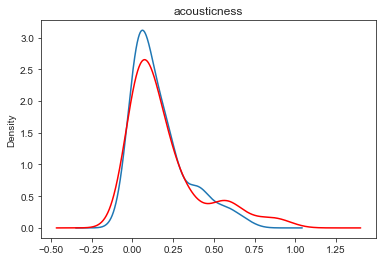

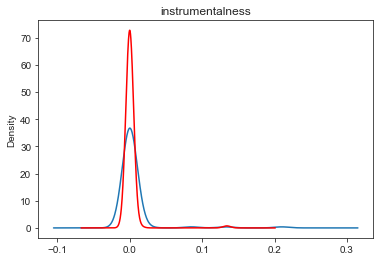

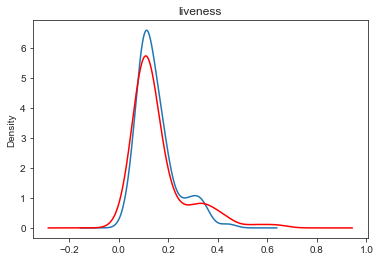

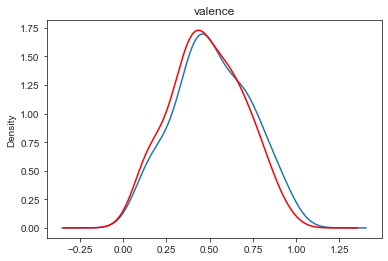

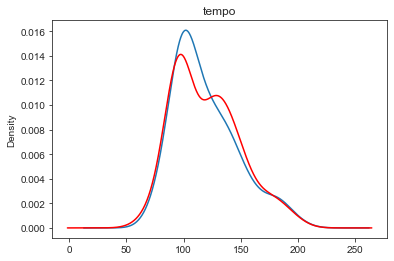

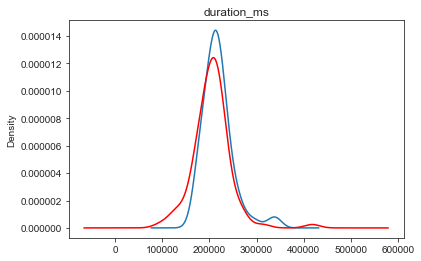

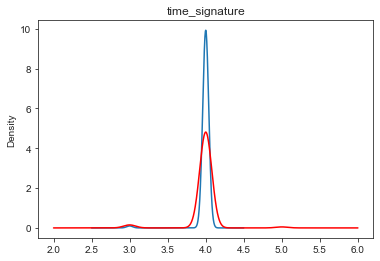

In [11]:
for i, column in enumerate(top2017.columns[3:]):
    #plt.figure(figsize=(18,8))
   # plt.xticks(rotation=45)
    top2017[column].plot(kind='density')
    top2018[column].plot(kind='density', color='red')
    
    plt.title(column)
    plt.show()